In [1]:
import tensorflow as tf
import numpy as np
from cv2 import cv2 as cv
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.1


In [17]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Dense对上一层的神经元进行全部连接，实现特征的非线性组合。
  tf.keras.layers.Dense(784, activation='relu'),
  # Dropout将在训练过程中每次更新参数时随机断开一定百分比（rate）的输入神经元，Dropout层用于防止过拟合。
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)
model.evaluate(x_test,  y_test, verbose=2)

model.save("../models/handwriting/1", save_format='tf')

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2064 - accuracy: 0.9388
Epoch 2/20
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0917 - accuracy: 0.9715
Epoch 3/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0660 - accuracy: 0.9788
Epoch 4/20
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0490 - accuracy: 0.9840 - loss: 0.049
Epoch 5/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0422 - accuracy: 0.9861
Epoch 6/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0356 - accuracy: 0.9882
Epoch 7/20
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0287 - accuracy: 0.9907
Epoch 8/20
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0274 - accuracy: 0.9909
Epoch 9/20
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0231 - accuracy: 0.9

In [3]:
def show(aim):
    [rows, cols] = aim.shape
    for row in range(rows):
        for col in range(cols):
            print(f"{aim[row, col]:3d}", end="")
        print()
            
            
def output(aim):
    [rows, cols] = aim.shape
    with open('out.txt', 'w') as file:
        for row in range(rows):
            for col in range(cols):
                file.write(f"{aim[row, col]:3d}", )
            file.write("\n")
            
saved_model = tf.keras.models.load_model("handwriting.h5")

#### 模型预测值

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ../models/handwriting/1/assets
Label of it: 5
Predict value: 5


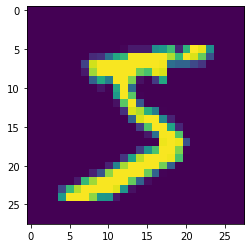

In [18]:
# 测试数据与标签值对比
model.save("../models/handwriting/1", save_format='tf')

res = saved_model.predict(np.array([x_train[0]]))
res = res[0].tolist()
print(f"Label of it: {y_train[0]}")
print(f"Predict value: {res.index(max(res))}")
plt.imshow(x_train[0])

[1.828951656790423e-09, 6.939696959307184e-07, 0.9902111887931824, 0.00978772435337305, 4.530019415138753e-11, 5.324385909943885e-08, 2.3836017248868302e-07, 2.3582716335290854e-10, 7.408777236150854e-08, 8.730457525809535e-15]
Predict value: 2


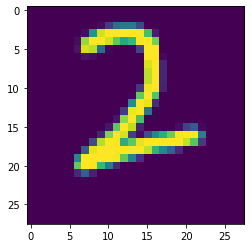

In [10]:
# 真实预测
img = cv.imread('2.jpeg', cv.IMREAD_GRAYSCALE)
scale_img = cv.resize(img, (28, 28), interpolation=cv.INTER_AREA)
plt.imshow(scale_img)

res = saved_model.predict(np.array([scale_img])/255.0)
res = res[0].tolist()
print(res)
print(f"Predict value: {res.index(max(res))}")